In [59]:
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPool2D, Flatten, Input, Concatenate, Dense, Dropout
from keras.models import Model, Sequential
from keras.utils import to_categorical
import tensorflow as tf
import numpy as np

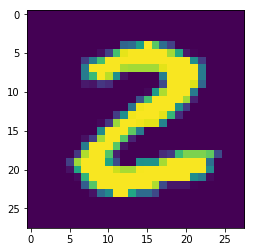

In [37]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[25])
x_train = np.reshape(x_train, (-1, x_train.shape[-2], x_train.shape[-1], 1))
x_test = np.reshape(x_test, (-1, x_test.shape[-2], x_test.shape[-1], 1))
depth = np.max(y_train) + 1
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Build a CNN model to recognition

In [74]:
inputLayer = Input((28, 28, 1), name='input')
kernal_sz = [3]
filters1 = 32
filters2 = 32
branches = []
for sz in kernal_sz:
    cnn2d = Conv2D(filters1, (sz, sz), activation="relu",kernel_initializer='glorot_normal') (inputLayer)
    maxpooling = MaxPool2D(pool_size=(2,2))(cnn2d)
    cnn2d = Conv2D(filters2, (sz, sz), activation="relu", kernel_initializer='glorot_normal') (maxpooling)
    maxpooling = MaxPool2D(pool_size=(2,2))(cnn2d)
    dropout = Dropout(0.2)(maxpooling)
    flatten = Flatten()(maxpooling)
    branches.append(flatten)

cnn_model = branches[0] #Concatenate()(branches)
dense_layer = Dense(512, activation="relu", kernel_initializer='glorot_normal')(cnn_model)
dropout_layer = Dropout(0.2)(dense_layer)
classifier = Dense(10, activation="softmax", kernel_initializer='glorot_normal')(dropout_layer)
model = Model(inputs=inputLayer, outputs=classifier)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
print(model.summary())

model.fit(x_train, y_train, batch_size=128, verbose=1, validation_split=0.2, epochs=10, shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_61 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 512)               410112    
__________

In [73]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Polling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu', kernel_initializer='glorot_normal'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3, 3), activation='relu', kernel_initializer='glorot_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(512, activation="relu", kernel_initializer='glorot_normal'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax', kernel_initializer='glorot_normal'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(x_train, y_train, batch_size=128, nb_epoch=5, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_60 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 512)               410112    
__________

C:\Users\jeremy.zheren\AppData\Roaming\Python\Python36\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 41s 854us/step - loss: 0.7185 - acc: 0.9003 - val_loss: 0.0620 - val_acc: 0.9802
Epoch 2/5
 7168/48000 [===>..........................] - ETA: 32s - loss: 0.0901 - acc: 0.97

KeyboardInterrupt: 

In [75]:
loss, metrics = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 322us/step


In [76]:
metrics

0.9888